In [2]:
#importing libraries
!pip install pandas
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
!pip install google-images-download 
import seaborn as sns

# do not display warnings in notebook 
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("C:\\Users\\Karan Shah\\Desktop\\Data Interpretation\\data.csv")

In [4]:
# List of countries for each continent
continents = {
    'Africa' : ['Algeria','Angola','Benin','Botswana','Burkina','Burundi','Cameroon','Cape Verde','Central African Republic','Chad','Comoros','Congo','DR Congo','Djibouti','Egypt','Equatorial Guinea','Eritrea','Ethiopia','Gabon','Gambia','Ghana','Guinea','Guinea Bissau','Ivory Coast','Kenya','Lesotho','Liberia','Libya','Madagascar','Malawi','Mali','Mauritania','Mauritius','Morocco','Mozambique','Namibia','Niger','Nigeria','Rwanda','Sao Tome and Principe','Senegal','Seychelles','Sierra Leone','Somalia','South Africa','South Sudan','Sudan','Swaziland','Tanzania','Togo','Tunisia','Uganda','Zambia','Zimbabwe','Burkina Faso'],
    'Antarctica' : ['Fiji','Kiribati','Marshall Islands','Micronesia','Nauru','New Zealand','Palau','Papua New Guinea','Samoa','Solomon Islands','Tonga','Tuvalu','Vanuatu'],
    'Asia' : ['Afghanistan','Bahrain','Bangladesh','Bhutan','Brunei','Burma (Myanmar)','Cambodia','China','China PR','East Timor','India','Indonesia','Iran','Iraq','Israel','Japan','Jordan','Kazakhstan','North Korea','South Korea','Korea Republic','Korea DPR','Kuwait','Kyrgyzstan','Laos','Lebanon','Malaysia','Maldives','Mongolia','Nepal','Oman','Pakistan','Palestine','Philippines','Qatar','Russian Federation','Saudi Arabia','Singapore','Sri Lanka','Syria','Tajikistan','Thailand','Turkey','Turkmenistan','United Arab Emirates','Uzbekistan','Vietnam','Yemen','Russia'],
    'Australia Oceania' : ['Australia','New Caledonia'],
    'Europe' : ['Albania','Andorra','Armenia','Austria','Azerbaijan','Belarus','Belgium','Bosnia Herzegovina','Bulgaria','Croatia','Cyprus','Czech Republic','Denmark','Estonia','Finland','France','FYR Macedonia','Georgia','Germany','Greece','Hungary','Iceland','Ireland','Italy','Kosovo','Latvia','Liechtenstein','Lithuania','Luxembourg','Macedonia','Malta','Moldova','Monaco','Montenegro','Netherlands','Northern Ireland','Norway','Poland','Portugal','Romania','San Marino','Scotland','Serbia','Slovakia','Slovenia','Spain','Sweden','Switzerland','Ukraine','England','Vatican City','Republic of Ireland','Wales'],
    'North America' : ['Antigua and Barbuda','Bahamas','Barbados','Belize','Canada','Costa Rica','Cuba','Dominica','Dominican Republic','El Salvador','Grenada','Guatemala','Haiti','Honduras','Jamaica','Mexico','Nicaragua','Panama','Saint Kitts and Nevis','Saint Lucia','Saint Vincent and the Grenadines','Trinidad and Tobago','United States'],
    'South America' : ['Argentina','Bolivia','Brazil','Chile','Colombia','Curacao','Ecuador','Guyana','Paraguay','Peru','Suriname','Trinidad & Tobago','Uruguay','Venezuela']}

# Function matching continent to countries
def find_continent(x, continents_list):
    # Iteration over 
    for key in continents_list:
        if x in continents_list[key]:
            return key
    return np.NaN

df['Continent'] = df['Nationality'].apply(lambda x: find_continent(x, continents))

In [5]:
#Defining Position from the list of preferred position
df['Position'] = df['Preferred Positions'].str.split().str[0]
df['PositionNum'] = df['Preferred Positions'].apply(lambda x: len(x.split()))

In [6]:
#converting amount to integers
def str2number(amount):
    if amount[-1] == 'M':
        return float(amount[1:-1])*1000000
    elif amount[-1] == 'K':
        return float(amount[1:-1])*1000
    else:
        return float(amount[1:])
    
df['ValueNum'] = df['Value'].apply(lambda x: str2number(x))
df['WageNum'] = df['Wage'].apply(lambda x: str2number(x))

In [7]:
list_stats = [ 'Age',   
    'Overall', 
    'Potential', 
    'ValueNum', 
    'WageNum', 
    'Acceleration',
    'Aggression',
    'Agility',
    'Balance',
    'Composure',
    'Crossing',
    'Curve',
    'Dribbling',
    'Finishing',
    'Free kick accuracy',
    'GK diving',
    'GK handling',
    'GK kicking',
    'GK positioning',
    'GK reflexes',
    'Heading accuracy',
    'Interceptions',
    'Jumping',
    'Long passing',
    'Long shots',
    'Penalties',
    'Positioning',
    'Short passing',
    'Shot power',
    'Sliding tackle',
    'Sprint speed',
    'Stamina',
    'Standing tackle',
    'Strength',
    'Vision',
    'Volleys']

In [8]:
stats = pd.DataFrame(df, columns=list_stats)

In [9]:
stats.head()

,Age,Overall,Potential,ValueNum,WageNum,Acceleration,Aggression,Agility,Balance,Composure,...,Positioning,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
0,32,94.0,94.0,95500000.0,565000.0,89.0,63.0,89.0,63.0,95.0,...,95,83.0,94.0,23.0,91.0,92.0,31.0,80.0,85,88.0
1,30,93.0,93.0,105000000.0,565000.0,92.0,48.0,90.0,95.0,96.0,...,93,88.0,85.0,26.0,87.0,73.0,28.0,59.0,90,85.0
2,25,92.0,94.0,123000000.0,280000.0,94.0,56.0,96.0,82.0,92.0,...,90,81.0,80.0,33.0,90.0,78.0,24.0,53.0,80,83.0
3,30,92.0,92.0,97000000.0,510000.0,88.0,78.0,86.0,60.0,83.0,...,92,83.0,87.0,38.0,77.0,89.0,45.0,80.0,84,88.0
4,31,92.0,92.0,61000000.0,230000.0,58.0,29.0,52.0,35.0,70.0,...,12,55.0,25.0,11.0,61.0,44.0,10.0,83.0,70,11.0


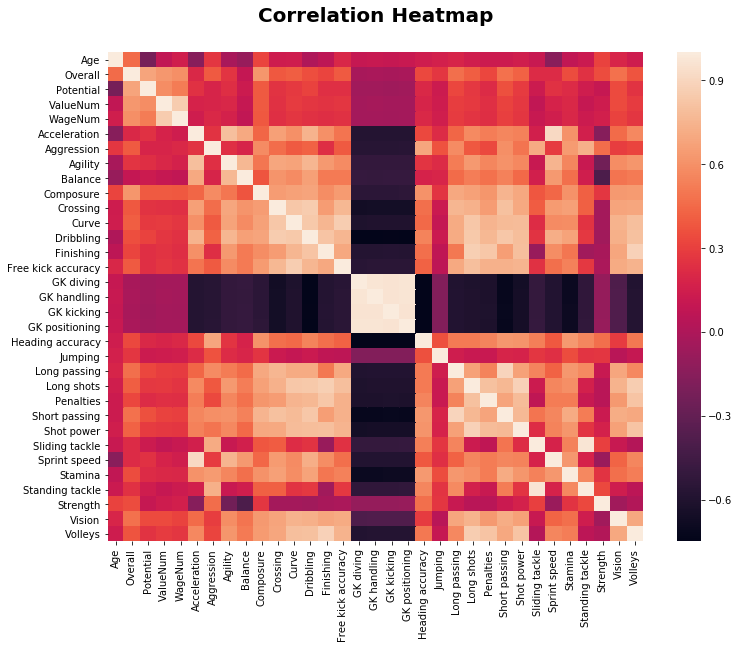

In [10]:
# calculate the correlation matrix
corr = stats.corr()
plt.figure(figsize = (12,9))
plt.title('Correlation Heatmap', fontsize=20, fontweight='bold', y=1.05,)

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

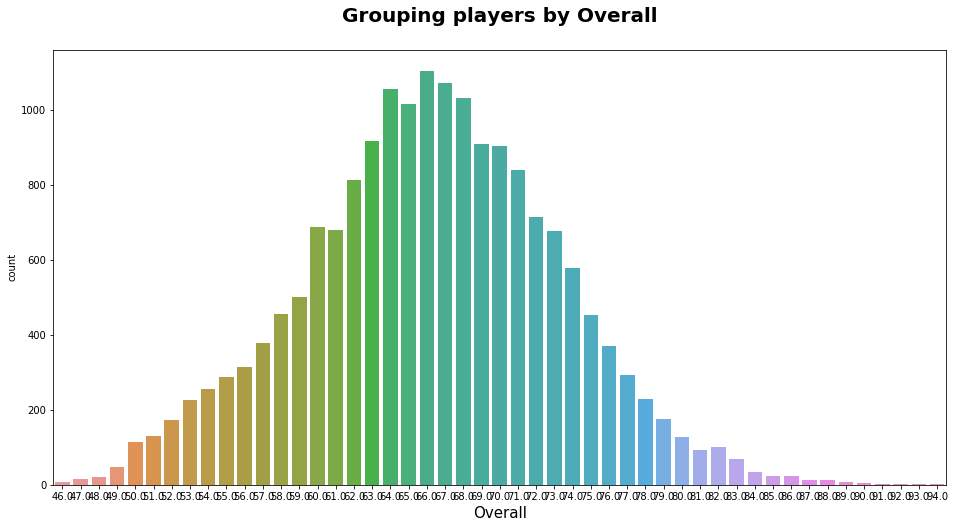

In [11]:
plt.figure(figsize=(16,8))
plt.title('Grouping players by Overall', fontsize=20, fontweight='bold', y=1.05,)
plt.xlabel('Number of players', fontsize=15)
plt.ylabel('Players Age', fontsize=10)
sns.countplot(x="Overall", data=df);
plt.show()

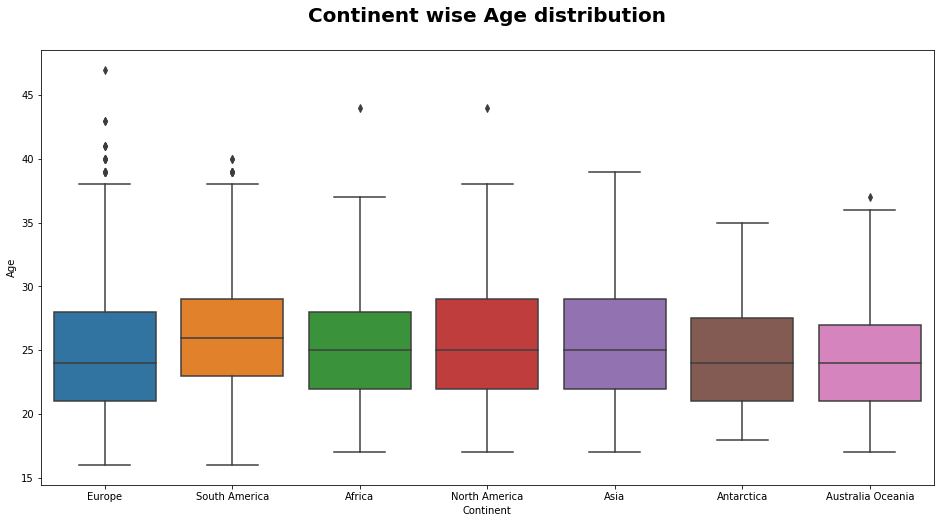

In [12]:
plt.figure(figsize=(16,8))
plt.title('Continent wise Age distribution', fontsize=20, fontweight='bold', y=1.05)
sns.boxplot(x="Continent", y="Age", data=df);

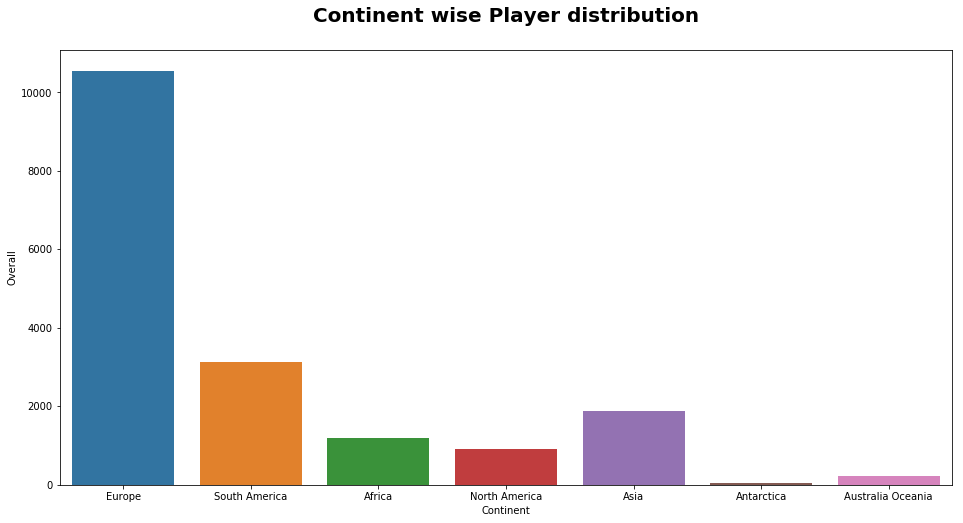

In [13]:
from numpy import median,mean
plt.figure(figsize=(16,8))
plt.title('Continent wise Player distribution', fontsize=20, fontweight='bold', y=1.05)
sns.barplot(x="Continent", y="Overall", data=df, estimator=len);


Item no.: 1 --> Item name = T. AlderweireldProfile Picture
Evaluating...
Starting Download...
Image URL: https://tot-tmp.azureedge.net/media/17383/firstteam_premierleague_westham_tobyalderweireld_1.jpg?anchor=center&mode=crop&width=750
Completed Image ====> 1.firstteam_premierleague_westham_tobyalderweireld_1.jpg

Errors: 0




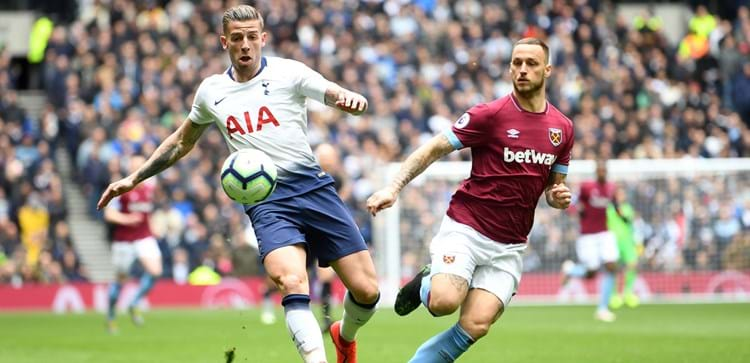

C:\Users\Karan Shah\Desktop\Data Interpretation\downloads\T. AlderweireldProfile Picture\1.firstteam_premierleague_westham_tobyalderweireld_1.jpg


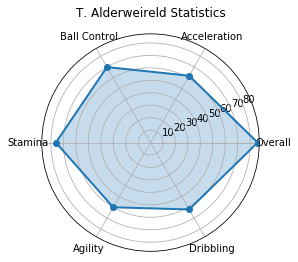

In [15]:
#lising player statistics
player_id = 56;
labels = np.array(['Overall','Acceleration','Ball Control','Stamina','Agility','Dribbling'])
stats=df.loc[player_id,labels].values
angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
# close the plot
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))
fig=plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2)
ax.fill(angles, stats, alpha=0.25)
ax.set_thetagrids(angles * 180/np.pi, labels)
ax.set_title(df.loc[player_id,"Name"] + " Statistics")
ax.grid(True)

#!pip install google_images_download
# importing google_images_download module 
from google_images_download import google_images_download 

# creating object 
response = google_images_download.googleimagesdownload() 

search_queries = [ df.loc[player_id,"Name"] + "Profile Picture"] 


def downloadimages(query): 

    arguments = {"keywords": query, 
                 "format": "jpg", 
                 "limit":1, 
                 "print_urls":True, 
                 "size": "medium", 
                 "aspect_ratio": "panoramic"} 
    try: 
        response.download(arguments) 

    # Handling File NotFound Error	 
    except FileNotFoundError: 
        arguments = {"keywords": query, 
                     "format": "jpg", 
                     "limit":4, 
                     "print_urls":True, 
                     "size": "medium"} 
        # Providing arguments for the searched query 
        try: 
    # Downloading the photos based 
    # on the given arguments 
            response.download(arguments) 
        except: 
            pass

# Driver Code 
for query in search_queries: 
    downloadimages(query) 
    print() 

name = df.loc[player_id,"Name"] + "Profile Picture"

import glob
from IPython.display import Image, display
for imageName in glob.glob('C:\\Users\\Karan Shah\\Desktop\\Data Interpretation\\downloads\\'+ name + '\\*.JPG'): #assuming JPG
    display(Image(filename=imageName))
    print(imageName)

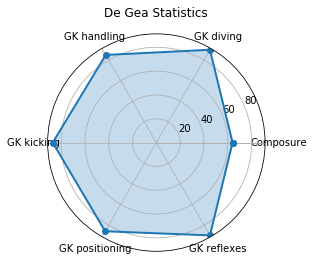

In [58]:
#lising player statistics
player_id = 6;
labels = np.array(['Composure',
    'GK diving',
    'GK handling',
    'GK kicking',
    'GK positioning',
    'GK reflexes',])
stats=df.loc[player_id,labels].values
angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
# close the plot
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))
fig=plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2)
ax.fill(angles, stats, alpha=0.25)
ax.set_thetagrids(angles * 180/np.pi, labels)
ax.set_title(df.loc[player_id,"Name"] + " Statistics")
ax.grid(True)

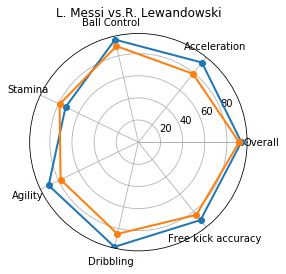

In [98]:
#comparing two players
player1_id = 1;
player2_id = 5;
labels = np.array(['Overall','Acceleration','Ball Control','Stamina','Agility','Dribbling','Free kick accuracy'])
stats1=df.loc[player1_id,labels].values
stats2=df.loc[player2_id,labels].values

angles1=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
angles2=np.linspace(0, 2*np.pi, len(labels), endpoint=False)


# close the plot
stats1=np.concatenate((stats1,[stats1[0]]))
stats2=np.concatenate((stats2,[stats2[0]]))
angles1=np.concatenate((angles1,[angles1[0]]))
angles2=np.concatenate((angles2,[angles2[0]]))

fig=plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles1, stats1, 'o-', linewidth=2)
ax.plot(angles2, stats2, 'o-',linewidth=2)
ax.set_thetagrids(angles1 * 180/np.pi, labels)
ax.set_title(df.loc[player1_id,"Name"] + " vs." + df.loc[player2_id,"Name"])
ax.grid(True)

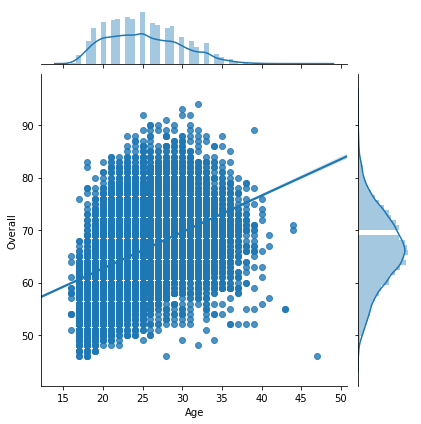

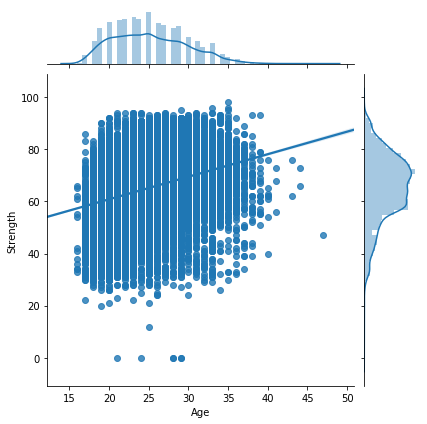

In [100]:
sns.jointplot(x="Age",y="Overall",data=df,kind='reg')#hex , kde, scatter
sns.jointplot(x="Age",y="Strength",data=df,kind='reg')#hex , kde, scatter

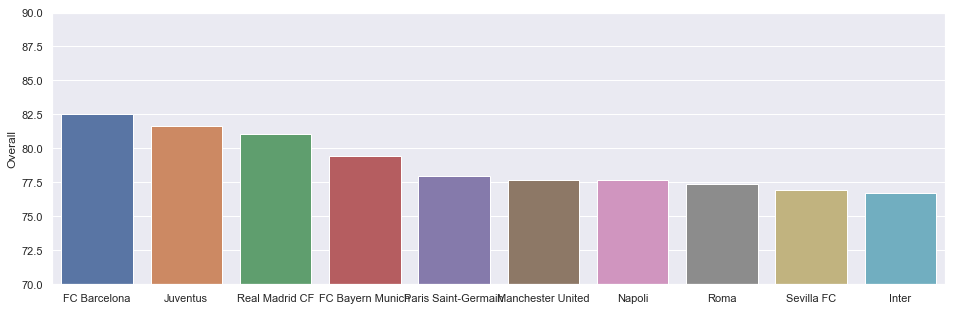

In [193]:
df3 = pd.pivot_table(df,index=["Club"],aggfunc='mean',fill_value=0)
df3 = df3.sort_values(by='Overall', ascending=False)
df6 = df3.head(10)
plt.figure(figsize=(16,5))
plt.ylim(70, 90)
sns.set(style='darkgrid')
sns.barplot(x=df6.index.tolist(), y="Overall", data=df6, estimator=mean);

In [163]:
df4 = pd.pivot_table(df,index=["Nationality"],aggfunc='count',fill_value=0)
df4 = df4.sort_values(by='Overall', ascending=False)
df4.head(10)

,Acceleration,Age,Aggression,Agility,Balance,Ball Control,Club,Composure,Crossing,Curve,...,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Value,Vision,Volleys,Wage
Nationality,,,,,,,,,,,,,,,,,,,,,
England,1630,1630,1630,1630,1630,1630,1630,1630,1630,1630,...,1630,1630,1630,1630,1630,1630,1630,1630,1630,1630
Germany,1140,1140,1140,1140,1140,1140,1140,1140,1140,1140,...,1140,1140,1140,1140,1140,1140,1140,1140,1140,1140
Spain,1019,1019,1019,1019,1019,1019,1019,1019,1019,1019,...,1019,1019,1019,1019,1019,1019,1019,1019,1019,1019
France,978,978,978,978,978,978,978,978,978,978,...,978,978,978,978,978,978,978,978,978,978
Argentina,965,965,965,965,965,965,965,965,965,965,...,965,965,965,965,965,965,965,965,965,965
Brazil,812,812,812,812,812,812,809,812,812,812,...,812,812,812,812,812,812,812,812,812,812
Italy,799,799,799,799,799,799,799,799,799,799,...,799,799,799,799,799,799,799,799,799,799
Colombia,592,592,592,592,592,592,591,592,592,592,...,592,592,592,592,592,592,592,592,592,592
Japan,469,469,469,469,469,469,469,469,469,469,...,469,469,469,469,469,469,469,469,469,469


In [17]:
!pip install plotly
import plotly.graph_objects as go

In [16]:
fig = go.Figure(data=go.Choropleth(
    locations = df['Nationality'],
    locationmode = "country names",
    z = df[''],
    text = df['Nationality'],
    colorscale = 'Blues',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_tickprefix = '',
    colorbar_title = 'Overall',
    showscale = False
))

fig.update_layout(
    title_text='FIFA 2018 Player Statistics',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='natural earth'
    ),
    annotations = [dict(
        x=0.55,
        y=0.1,
        xref='paper',
        yref='paper',
        showarrow = False
    )]
)

fig.show()

NameError: name 'go' is not defined